In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import os
import sys
import matplotlib.pyplot as plt

sys.path.append(r"C:\Users\usuar\Desktop\The_Bridge\EDA_F1_Analysis\src\utils")
from funciones_eda import *

Este df es para saber que equipos fueron los campeones de su año. Tan solo cogeremos los datos del equipo campeón que los juntaremos. El premio de equipo ganador comenzó a darse en 1958, por lo que en años anteriores no se tendrá en cuenta.

In [2]:
# Equipos ganadores del campeonato. Creamos este df para saber cual es el equipo que
# ganó el mundial y juntarlo con el de pilotos ganadores.
url = "https://es.wikipedia.org/wiki/Campeonato_Mundial_de_Constructores_de_F%C3%B3rmula_1"

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find_all('table', {'class': 'wikitable sortable'})[0]
rows = table.find_all('tr')
headers = [th.get_text(strip=True) for th in rows[0].find_all('th')]

data = []
for row in rows[1:]:
    cols = row.find_all('td')
    if len(cols) == 12:
        cols = [col.get_text(strip=True) for col in cols]
        data.append(cols)

df_equipos_ganadores = pd.DataFrame(data, columns=headers)

Segundo notebook: análisis gráfico de los datos.

In [3]:
# Creación del df de pilotos campeones de la F1.
url = "https://en.wikipedia.org/wiki/List_of_Formula_One_World_Drivers%27_Champions"

response = requests.get(url)

soup = BeautifulSoup(response.text, "html.parser")
tabla = soup.find("table", {"class": "wikitable sortable"})
filas = tabla.find_all("tr")
data = []

for fila in filas[1:]:  # Ignora la primera fila que es el encabezado
    cols = fila.find_all("td")
    
    if len(cols) == 16:
        year = cols[0].text.strip()
        driver = cols[1].text.strip()
        age = cols[2].text.strip()
        team = cols[3].text.strip()
        engine = cols[4].text.strip()
        tyres = cols[5].text.strip()
        pole = cols[6].text.strip()
        wins = cols[7].text.strip()
        podiums = cols[8].text.strip()
        fastest_laps = cols[9].text.strip()
        points = cols[10].text.strip()
        percent_points = cols[11].text.strip()
        clinched = cols[12].text.strip()
        rounds_remaining = cols[13].text.strip()
        margin = cols[14].text.strip()
        percent_margin = cols[15].text.strip()
        
        data.append([year, driver, age, team, engine, tyres, pole, wins, 
                     podiums, fastest_laps, points, percent_points, clinched, 
                     rounds_remaining, margin, percent_margin])

df_temporadas_f1 = pd.DataFrame(data, columns=[
    "year", "Driver", "Age", "Team", "Engine", "Tyres", "Pole", 
    "Wins", "Podiums", "Fastest Laps", "Points", "% Points", "Clinched", 
    "# of Rounds Remaining", "Margin", "% Margin"
])

# Eliminar los corchetes y contenido de las columnas que tienen corchetes para limpiar los datos.
for column in df_temporadas_f1.columns:
    for index in range(len(df_temporadas_f1)):
        df_temporadas_f1.at[index, column] = re.sub(r'\[.*?\]', '', str(df_temporadas_f1.at[index, column]))

# Convertir los datos de la variable "Tyres" en un solo valor para poder analizarlo mejor.
df_temporadas_f1["year"] = pd.to_numeric(df_temporadas_f1["year"])
df_temporadas_f1.loc[df_temporadas_f1["Tyres"] == "F P", "Tyres"] = "F"
df_temporadas_f1.loc[df_temporadas_f1["Tyres"] == "M G", "Tyres"] = "G"

# Convertir las variables númericas en tipo "int" y "float".
columnas_cambio_tipo = ["Age","Pole","Wins","Podiums","Fastest Laps","# of Rounds Remaining"]
df_temporadas_f1[columnas_cambio_tipo] = df_temporadas_f1[columnas_cambio_tipo].astype(int)
df_temporadas_f1["Points"] = df_temporadas_f1["Points"].astype(float)

In [4]:
# Añadir filas por encima del df de equipos ganadores para poder juntarlo con el otro y cuadre el número de filas.
diferencia = 75 - len(df_equipos_ganadores)

# Si faltan filas, añadir filas vacías solo al principio.
if diferencia > 0:
    filas_extra = pd.DataFrame( index=range(diferencia), columns=df_equipos_ganadores.columns)
    df_equipos_ganadores = pd.concat([filas_extra, df_equipos_ganadores], ignore_index=True)

df_temporadas_f1["Team_winner"] = df_equipos_ganadores["Constructor"]
# Sustituir los nulos por "Not awarded".
df_temporadas_f1["Team_winner"] = df_temporadas_f1["Team_winner"].fillna("Not awarded")

In [5]:
df_temporadas_f1.describe()

,year,Age,Pole,Wins,Podiums,Fastest Laps,Points,# of Rounds Remaining
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,1987.000000,31.560000,5.960000,6.373333,10.040000,3.960000,134.686667,1.360000
std,21.794495,5.415793,3.699671,3.380282,4.075106,2.373502,135.705981,1.467117
min,1950.000000,23.000000,0.000000,1.000000,3.000000,0.000000,30.000000,0.000000
25%,1968.500000,28.000000,3.000000,4.000000,7.000000,2.000000,50.500000,0.000000
50%,1987.000000,31.000000,6.000000,6.000000,10.000000,3.000000,73.000000,1.000000
75%,2005.500000,34.000000,9.000000,8.500000,12.000000,6.000000,128.000000,2.000000
max,2024.000000,46.000000,15.000000,19.000000,21.000000,10.000000,575.000000,6.000000


In [6]:
df_temporadas_f1

,year,Driver,Age,Team,Engine,Tyres,Pole,Wins,Podiums,Fastest Laps,Points,% Points,Clinched,# of Rounds Remaining,Margin,% Margin,Team_winner
0,1950,Giuseppe Farina,44,Alfa Romeo,Alfa Romeo,P,2,3,3,3,30.0,83.333 (47.619),Round 7 of 7,0,3,10.000,Not awarded
1,1951,Juan Manuel Fangio,40,Alfa Romeo,Alfa Romeo,P,4,3,5,5,31.0,86.111 (51.389),Round 8 of 8,0,6,19.355,Not awarded
2,1952,Alberto Ascari,34,Ferrari,Ferrari,F,5,6,6,6,36.0,100.000 (74.306),Round 6 of 8,2,12,33.333,Not awarded
3,1953,Alberto Ascari,35,Ferrari,Ferrari,P,6,5,5,4,34.5,95.833 (57.407),Round 8 of 9,1,6.5,18.841,Not awarded
4,1954,Juan Manuel Fangio,43,Maserati,Maserati,P,5,6,7,3,42.0,93.333 (70.547),Round 7 of 9,2,16.857,40.136,Not awarded
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,2020,Lewis Hamilton,35,Mercedes,Mercedes,P,10,11,14,6,347.0,78.507,Round 14 of 17,3,124,35.735,Mercedes
71,2021,Max Verstappen,24,Red Bull,Honda,P,10,10,18,6,395.5,69.692,Round 22 of 22,0,8,2.023,Mercedes
72,2022,Max Verstappen,25,Red Bull,RBPT,P,7,15,17,5,454.0,76.174,Round 18 of 22,4,146,32.159,Red Bull
73,2023,Max Verstappen,26,Red Bull,Honda RBPT,P,12,19,21,9,575.0,92.742,Round 17 of 22,5,290,50.435,Red Bull


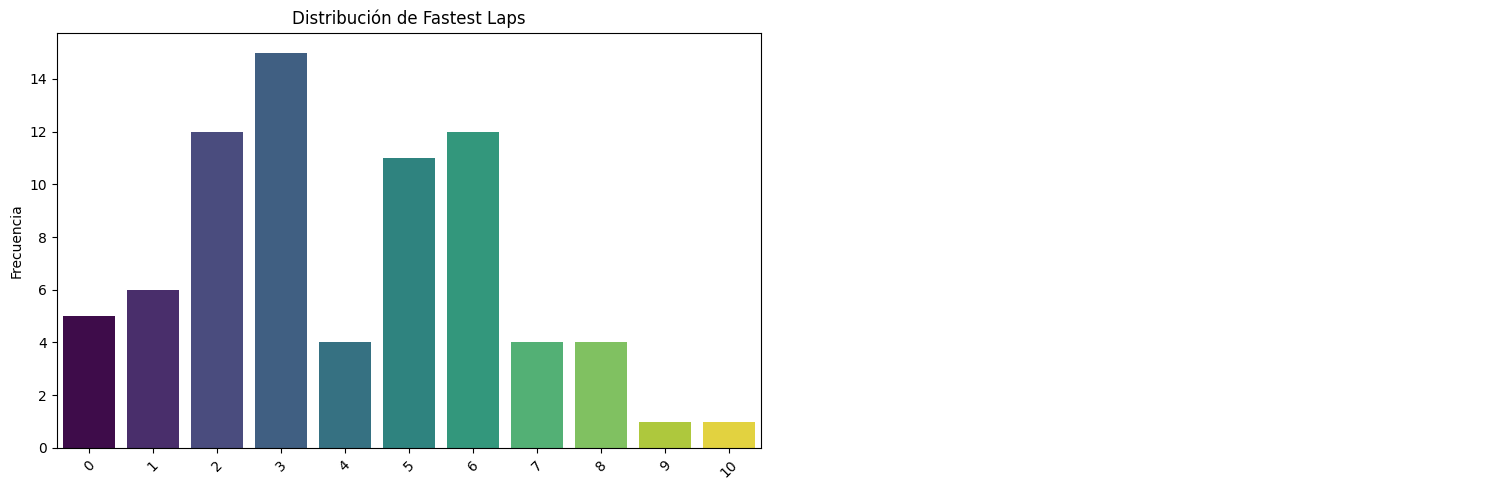

In [7]:
pinta_distribucion_categoricas(df_temporadas_f1, ["Fastest Laps"] )

En este primer análisis se pueden observar varias cosas. La de edad media de los pilotos campeones es de 31 - 32 años. La media de carreras ganadas por temporada es de 6-7. La media de podiums (1er, 2do o 3er puesto) ganados en una temporada por un piloto campeón es de 10. 

In [8]:
df_temporadas_f1.describe(include = ["object"])

,Driver,Team,Engine,Tyres,% Points,Clinched,Margin,% Margin,Team_winner
count,75,75,75,75,75,75,75,75,75
unique,34,16,14,8,74,43,43,71,16
top,Michael Schumacher,Ferrari,Ferrari,G,73.737 (52.778),Round 16 of 16,1,10.000,Ferrari
freq,7,15,15,25,2,9,8,2,16


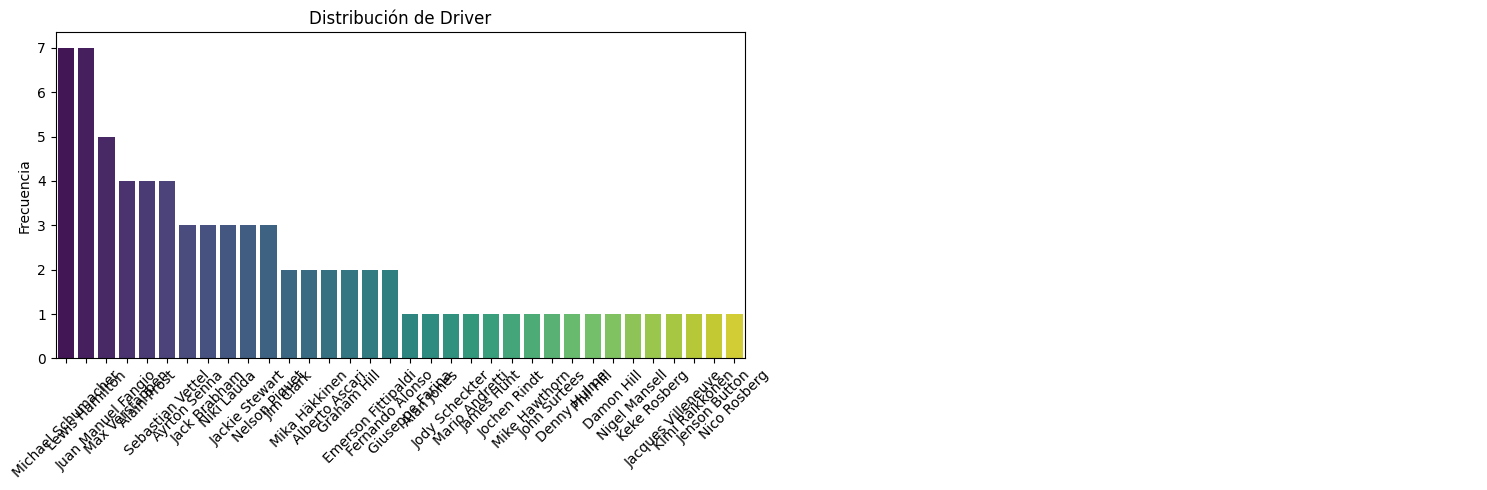

In [9]:
pinta_distribucion_categoricas(df_temporadas_f1, ["Driver"])

En este análisis de las variables no numéricas se pueden observar varias cosas. Los pilotos con más mundiales son Michales Schumaches y Lewis Hamilton, ambos con 7 mundiales. El equipo con más títulos es Ferrari, con un total de 16 títulos mundiales.

A primera vista se podría decir que si un piloto corre para Ferrari es más probable que gane un mundial que si corre para otro equipo.

DF COMBINADO
En df tiene todas las carreras disputadas en la F1 desde 1950 hasta 2024.

In [18]:
# Extracción de los datos para crear el df.
circuits = pd.read_csv("../data/f1_data/circuits.csv")
constructors = pd.read_csv("../data/f1_data/constructors.csv")
constructor_results = pd.read_csv("../data/f1_data/constructor_results.csv")
constructor_standings = pd.read_csv("../data/f1_data/constructor_standings.csv")
drivers = pd.read_csv("../data/f1_data/drivers.csv")
driver_standings = pd.read_csv("../data/f1_data/driver_standings.csv")
lap_times = pd.read_csv("../data/f1_data/lap_times.csv")
pit_stops = pd.read_csv("../data/f1_data/pit_stops.csv")
qualifying = pd.read_csv("../data/f1_data/qualifying.csv")
races = pd.read_csv("../data/f1_data/races.csv")
results = pd.read_csv("../data/f1_data/results.csv")
seasons = pd.read_csv("../data/f1_data/seasons.csv")
status = pd.read_csv("../data/f1_data/status.csv")

df_combinado = pd.merge(results, races, on='raceId', how='left')

df_combinado = pd.merge(df_combinado, drivers, on='driverId', how='left')

if 'constructorId' in constructors.columns:
    df_combinado = pd.merge(df_combinado, constructors, on='constructorId', how='left')

if 'constructorId' in constructor_results.columns:
    df_combinado = pd.merge(df_combinado, constructor_results, on=['raceId', 'constructorId'], how='left')

if 'constructorId' in constructor_standings.columns:
    df_combinado = pd.merge(df_combinado, constructor_standings, on=['raceId', 'constructorId'], how='left')

if 'raceId' in qualifying.columns and 'driverId' in qualifying.columns:
    df_combinado = pd.merge(df_combinado, qualifying, on=['raceId', 'driverId'], how='left', suffixes=('', '_qualifying'))

df_combinado = df_combinado.loc[:, ~df_combinado.columns.str.endswith('_qualifying')]

if 'raceId' in driver_standings.columns and 'driverId' in driver_standings.columns:
    df_combinado = pd.merge(df_combinado, driver_standings, on=['raceId', 'driverId'], how='left', suffixes=('', '_driver_standings'))

# Eliminar las columnas duplicadas si ya existen en el DataFrame
df_combinado = df_combinado.loc[:, ~df_combinado.columns.str.endswith('_driver_standings')]

if 'year' in seasons.columns:
    df_combinado = pd.merge(df_combinado, seasons, on='year', how='left', suffixes=('', '_seasons'))

    df_combinado = df_combinado.loc[:, ~df_combinado.columns.str.endswith('_seasons')]
    
if 'statusId' in status.columns:
    df_combinado = pd.merge(df_combinado, status, on='statusId', how='left')

# Eliminación de duplicados.
df_combinado = df_combinado.drop_duplicates()
pd.set_option("display.max_columns", None)

# Eliminar colunmas que no nos interesan.
df_combinado.drop(columns=["url_x","url_y","url","quali_date","quali_time","sprint_date","sprint_time",
                          "name_y","surname","fp1_date","fp1_time","fp2_date","fp2_time",
                          "fp3_date","fp3_time","milliseconds","time_y","positionText_x","number_y",
                          "positionText_y","driverId","qualifyId","number","statusId","resultId","constructorId",
                          "positionText","rank","driverStandingsId","status_x","constructorResultsId",
                          "constructorStandingsId","position","circuitId"], inplace = True)

# Renombrar columnas para entenderlas.
df_combinado.rename(columns={"nationality_y":"team_nation","nationality_x":"driver_nation","constructorRef":"team",
                            "date":"race_date","name_x":"grand_prix_name","time_x":"driver_race_time",
                            "position_x":"driver_race_position","number_x":"car_number","points_x":"driver_points",
                            "wins":"team_wins","points_y":"team_points","position_y":"team_position",
                            "status_y":"driver_race_status","points":"total_points"}, inplace=True)
df_combinado[df_combinado["year"] == 2024]

,raceId,car_number,grid,driver_race_position,positionOrder,driver_points,laps,driver_race_time,fastestLap,fastestLapTime,fastestLapSpeed,year,round,grand_prix_name,race_date,driverRef,code,forename,dob,driver_nation,team,team_nation,team_points,total_points,team_position,team_wins,q1,q2,q3,driver_race_status
26280,1121,1,1,1,1,26.0,57,1:31:44.742,39,1:32.608,210.383,2024,1,Bahrain Grand Prix,2024-03-02,max_verstappen,VER,Max,1997-09-30,Dutch,red_bull,Austrian,44.0,44.0,1.0,1.0,1:30.031,1:29.374,1:29.179,Finished
26281,1121,11,5,2,2,18.0,57,+22.457,40,1:34.364,206.468,2024,1,Bahrain Grand Prix,2024-03-02,perez,PER,Sergio,1990-01-26,Mexican,red_bull,Austrian,44.0,44.0,1.0,1.0,1:30.221,1:29.932,1:29.537,Finished
26282,1121,55,4,3,3,15.0,57,+25.110,44,1:34.507,206.156,2024,1,Bahrain Grand Prix,2024-03-02,sainz,SAI,Carlos,1994-09-01,Spanish,ferrari,Italian,27.0,27.0,2.0,0.0,1:29.909,1:29.573,1:29.507,Finished
26283,1121,16,2,4,4,12.0,57,+39.669,36,1:34.090,207.069,2024,1,Bahrain Grand Prix,2024-03-02,leclerc,LEC,Charles,1997-10-16,Monegasque,ferrari,Italian,27.0,27.0,2.0,0.0,1:30.243,1:29.165,1:29.407,Finished
26284,1121,63,3,5,5,10.0,57,+46.788,40,1:35.065,204.946,2024,1,Bahrain Grand Prix,2024-03-02,russell,RUS,George,1998-02-15,British,mercedes,German,16.0,16.0,3.0,0.0,1:30.350,1:29.922,1:29.485,Finished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26514,1132,31,18,16,16,0.0,50,\N,46,1:30.875,233.371,2024,12,British Grand Prix,2024-07-07,ocon,OCO,Esteban,1996-09-17,French,alpine,French,0.0,9.0,8.0,0.0,1:34.557,\N,\N,+2 Laps
26515,1132,11,0,17,17,0.0,50,\N,50,1:29.707,236.409,2024,12,British Grand Prix,2024-07-07,perez,PER,Sergio,1990-01-26,Mexican,red_bull,Austrian,18.0,373.0,1.0,7.0,1:38.348,\N,\N,+2 Laps
26516,1132,24,14,18,18,0.0,50,\N,43,1:31.014,233.014,2024,12,British Grand Prix,2024-07-07,zhou,ZHO,Guanyu,1999-05-30,Chinese,sauber,Swiss,0.0,0.0,10.0,0.0,1:31.190,1:27.867,\N,+2 Laps
26517,1132,63,1,\N,19,0.0,33,\N,3,1:31.298,232.289,2024,12,British Grand Prix,2024-07-07,russell,RUS,George,1998-02-15,British,mercedes,German,25.0,221.0,4.0,2.0,1:30.106,1:26.723,1:25.819,Water pressure


In [13]:
df_combinado['team'].isnull().sum(), df_combinado['driver_race_position'].isnull().sum()


(np.int64(0), np.int64(0))

In [19]:
plot_categorical_relationship_fin(df_combinado, ["team"],["driver_race_status"])

ValueError: Grouper and axis must be same length